<a href="https://colab.research.google.com/github/toyinolape/Py4e_UofM/blob/master/StarterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Starter Notebook for;
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files

In [ ]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
subs = pd.read_csv('SampleSubmission.csv')

In [ ]:
# check data shapes
train.shape, test.shape, subs.shape

((12632, 49), (6222, 48), (6222, 2))

In [ ]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422.0,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159.0,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602.0,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996.0,2.609576,3.386925e+11,10384.798216


In [ ]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [ ]:
subs.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


# Let's look for missing values

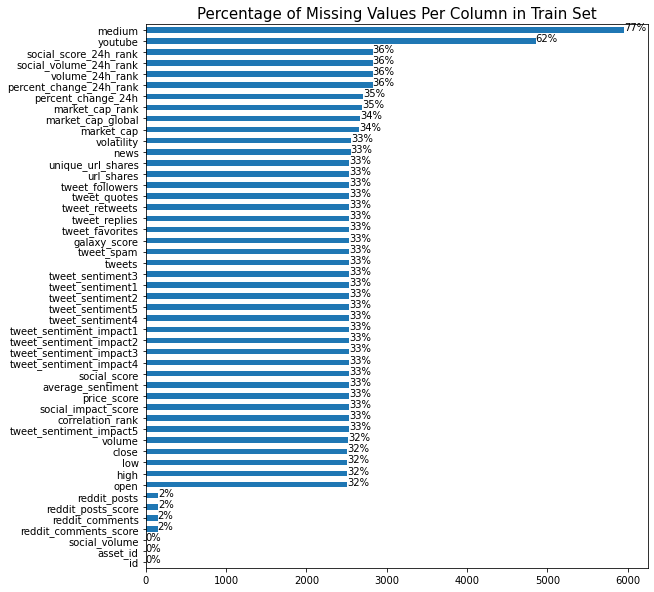

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

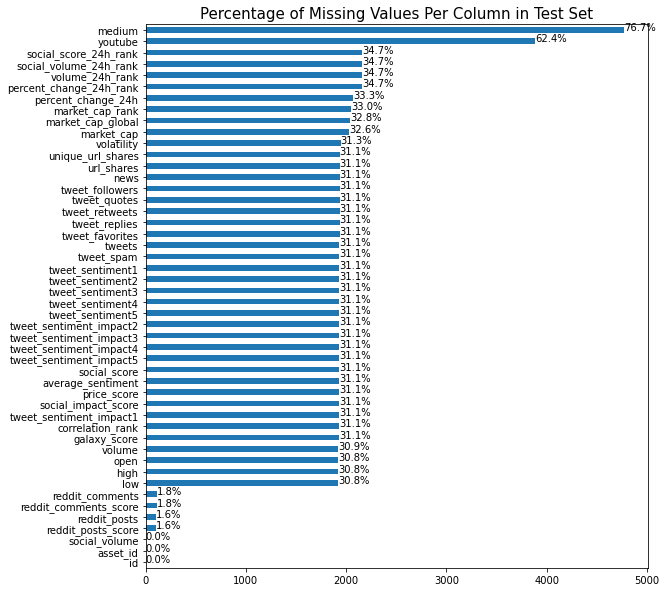

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

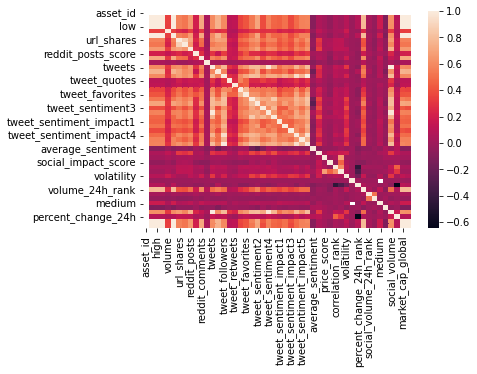

In [ ]:
#Check the variables correlated with the target feature 
sns.heatmap(.corr()) # cmap='RdYlGn'



In [ ]:
#check correlated features to use for training the model
corr = 0 
for x in train.columns:
  if train[x].dtype != object:
    corr = train[x].corr(train['close'])
    print("{} correlation with close :{}" .format(x, corr))
  else:
    continue
#0.758640289091186

asset_id correlation with close :nan
open correlation with close :0.9999303252970702
high correlation with close :0.9999694722825505
low correlation with close :0.9999584004690043
volume correlation with close :0.38516330776408253
market_cap correlation with close :0.9999780431295909
url_shares correlation with close :0.5698209814758984
unique_url_shares correlation with close :0.5255426632670073
reddit_posts correlation with close :0.6572335784247281
reddit_posts_score correlation with close :0.2402650233391
reddit_comments correlation with close :0.7031469540772353
reddit_comments_score correlation with close :0.03408083792815346
tweets correlation with close :0.621414793529457
tweet_spam correlation with close :0.7515503961771778
tweet_followers correlation with close :0.6137226307059532
tweet_quotes correlation with close :0.07891763389400727
tweet_retweets correlation with close :0.15750672138037722
tweet_replies correlation with close :0.3471334026243371
tweet_favorites correlati

In [ ]:
#Get the names for the values where correlation is higer/lower than (+/-) 0.75

#check correlated features to use for training the model
corr_features = [] 
for x in train.columns:
  if train[x].dtype != object:
    corr = train[x].corr(train['close'])
    if (corr >= 0.75 or corr <= -0.75):
      corr_features.append(x)
    #print("{} correlation with close :{}" .format(x, corr))
  else:
    continue
#0.758640289091186

In [ ]:
corr_features

['open',
 'high',
 'low',
 'market_cap',
 'tweet_spam',
 'volume_24h_rank',
 'market_cap_global',
 'close']

In [ ]:
new_corr = ['open',
 'high',
 'low',
 'close']

In [ ]:
train.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,12402.000000,12402.000000,8584.000000,8584.000000,8.574000e+03,8574.000000,8574.000000,8574.000000,8574.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03,8.584000e+03,8.584000e+03,8.584000e+03,8.584000e+03,8584.000000,8556.000000,8584.000000,8584.000000,8584.000000,8584.000000,8546.000000,8314.000000,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,101.397436,373.067328,4787.700839,1359.266193,2.240930e+07,152.879170,1673.725916,628.944717,5729.612783,135.003611,400.070480,675.888048,3336.687791,233.689306,1.414540e+06,2.870625e+06,2.658385e+06,1.403838e+07,1.730606e+06,2.263903e+07,3.654485,25.713651,3.002924,3.683644,3.269793,68.062698,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,89.474521,2289.393857,4698.346982,1319.529420,2.925547e+07,825.124037,6897.963587,1131.808003,13515.879088,158.919580,453.837188,499.411760,3710.525848,218.058142,3.727319e+06,5.994027e+06,4.095968e+06,1.818741e+07,3.988111e+06,3.024835e+07,0.095395,23.701377,0.789208,0.579811,0.727227,6.237936,0.019247,0.066702,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,218.000000,24.000000,6.965840e+05,0.000000,3.000000,0.000000,2.000000,0.000000,5.000000,23.000000,141.000000,4.000000,0.000000e+00,2.363000e+03,6.622000e+04,2.831590e+05,4.967000e+03,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,37.000000,0.001580,1.000000,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,41.000000,128.000000,2602.500000,342.000000,9.311164e+06,33.000000,517.000000,197.000000,1490.000000,65.000000,143.000000,387.000000,1706.500000,118.000000,1.514345e+05,5.322950e+05,1.133224e+06,6.243698e+06,2.800610e+05,9.279215e+06,3.600000,10.000000,2.700000,3.000000,2.800000,64.500000,0.006975,1.000000,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,65.000000,233.000000,3619.000000,811.000000,1.408329e+07,70.000000,881.000000,367.500000,2733.500000,102.000000,253.500000,557.000000,2423.000000,184.000000,3.352840e+05,1.111772e+06,1.710463e+06,9.478264e+06,5.413245e+05,1.408742e+07,3.700000,24.000000,3.000000,3.800000,3.200000,68.000000,0.011193,1.000000,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'market_cap')

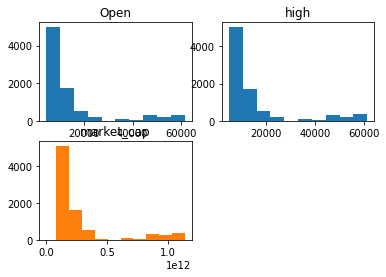

In [ ]:
#visualize the skewness of the correlated features
#plt.fig(figsize=(150,125))
plt.subplot(2,2,1)
plt.hist(x=train['open'])
plt.title("Open")

plt.subplot(2,2,2)
plt.hist(x=train['high'])
plt.title("high")

plt.subplot(2,2,3)
plt.hist(x=train['low'])
plt.title("low")

plt.subplot(2,2,3)
plt.hist(x=train['market_cap'])
plt.title("market_cap")

In [ ]:
# Check for duplicates
#train[train.close != 0]
train.duplicated().any(), test.duplicated().any()
train =  train[new_corr]
test = test[new_corr[0:len(new_corr)-1]]

In [ ]:
# fill missing values
#train.fillna(train.mean(), inplace=True)
train = train.fillna(0)
#test.fillna(test.mean(), inplace=True)
test = test.fillna(0)

In [ ]:
# Select main columns to be used in training
X = train.drop('close', axis= 1)
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
#Standardizing the values since the features are skewed

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
r_test = ss.transform(test)

In [ ]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
y1_pred = clf.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error


# Compute and print R^2 and RMSE
print("R^2: {}".format(lm2.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9999741306149863
Root Mean Squared Error: 69.70688018444879


In [ ]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(r_test)
sub_file = subs.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

In [ ]:
sub_file.head()

,id,close
0,ID_323Sn2,1.599920
1,ID_325SNW,11346.599000
2,ID_325uzE,6306.078523
3,ID_328qCx,1.599920
4,ID_3293uJ,1.599920


In [ ]:
files.download('Baseline.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>